In [59]:
from fastai.data.all import *
from fastai.vision.all import *
import fastai
import pandas as pd
import statistics
import matplotlib.pyplot as plt

In [22]:
df=pd.read_csv('ArtEmisv1.csv')
df

,art_style,painting,emotion
0,Post_Impressionism,vincent-van-gogh_portrait-of-madame-ginoux-l-arlesienne-1890,something else
1,Post_Impressionism,vincent-van-gogh_portrait-of-madame-ginoux-l-arlesienne-1890,sadness
2,Post_Impressionism,vincent-van-gogh_portrait-of-madame-ginoux-l-arlesienne-1890,something else
3,Post_Impressionism,vincent-van-gogh_portrait-of-madame-ginoux-l-arlesienne-1890,contentment
4,Post_Impressionism,vincent-van-gogh_portrait-of-madame-ginoux-l-arlesienne-1890,awe
...,...,...,...
454679,Cubism,gino-severini_a-dancer-1,awe
454680,Romanticism,ivan-aivazovsky_sea-at-night-1861,awe
454681,Romanticism,ivan-aivazovsky_sea-at-night-1861,excitement
454682,Romanticism,ivan-aivazovsky_sea-at-night-1861,contentment


In [48]:
processed=df.groupby(["art_style","painting"])["emotion"].agg(pd.Series.mode).reset_index()
processed

,art_style,painting,emotion
0,Abstract_Expressionism,aaron-siskind_acolman-1-1955,fear
1,Abstract_Expressionism,aaron-siskind_chicago-1951,fear
2,Abstract_Expressionism,aaron-siskind_chicago-6-1961,fear
3,Abstract_Expressionism,aaron-siskind_feet-102-1957,"[disgust, something else]"
4,Abstract_Expressionism,aaron-siskind_gloucester-16a-1944,something else
...,...,...,...
80026,Ukiyo_e,utagawa-toyokuni_the-actor-otani-monzo-in-the-role-of-igarashi-tenzen,fear
80027,Ukiyo_e,utagawa-toyokuni_the-heian-courtier,contentment
80028,Ukiyo_e,utagawa-toyokuni_the-promenade,contentment
80029,Ukiyo_e,utagawa-toyokuni_three-beauties-playing-battledore-and-shuttlecock,"[awe, contentment]"


In [49]:
t=type(processed.emotion[3])
processed2=processed[processed["emotion"].apply(lambda x: type(x) !=t )]
processed2

,art_style,painting,emotion
0,Abstract_Expressionism,aaron-siskind_acolman-1-1955,fear
1,Abstract_Expressionism,aaron-siskind_chicago-1951,fear
2,Abstract_Expressionism,aaron-siskind_chicago-6-1961,fear
4,Abstract_Expressionism,aaron-siskind_gloucester-16a-1944,something else
6,Abstract_Expressionism,aaron-siskind_kentucky-4-1951,something else
...,...,...,...
80024,Ukiyo_e,utagawa-toyokuni_segawa-kikunojo-iii-and-bando-mitsugoro-ii-1798,amusement
80025,Ukiyo_e,utagawa-toyokuni_seki-sanjuro,awe
80026,Ukiyo_e,utagawa-toyokuni_the-actor-otani-monzo-in-the-role-of-igarashi-tenzen,fear
80027,Ukiyo_e,utagawa-toyokuni_the-heian-courtier,contentment


In [51]:
processed2=processed2.reset_index()
processed2

,index,art_style,painting,emotion
0,0,Abstract_Expressionism,aaron-siskind_acolman-1-1955,fear
1,1,Abstract_Expressionism,aaron-siskind_chicago-1951,fear
2,2,Abstract_Expressionism,aaron-siskind_chicago-6-1961,fear
3,4,Abstract_Expressionism,aaron-siskind_gloucester-16a-1944,something else
4,6,Abstract_Expressionism,aaron-siskind_kentucky-4-1951,something else
...,...,...,...,...
59664,80024,Ukiyo_e,utagawa-toyokuni_segawa-kikunojo-iii-and-bando-mitsugoro-ii-1798,amusement
59665,80025,Ukiyo_e,utagawa-toyokuni_seki-sanjuro,awe
59666,80026,Ukiyo_e,utagawa-toyokuni_the-actor-otani-monzo-in-the-role-of-igarashi-tenzen,fear
59667,80027,Ukiyo_e,utagawa-toyokuni_the-heian-courtier,contentment


In [52]:
processed2['path']= processed2.apply(lambda x: 'dataset\\wikiart\\'+x['art_style']+"\\"+ x['painting']+".jpg", axis=1)
processed2

,index,art_style,painting,emotion,path
0,0,Abstract_Expressionism,aaron-siskind_acolman-1-1955,fear,dataset\wikiart\Abstract_Expressionism\aaron-siskind_acolman-1-1955.jpg
1,1,Abstract_Expressionism,aaron-siskind_chicago-1951,fear,dataset\wikiart\Abstract_Expressionism\aaron-siskind_chicago-1951.jpg
2,2,Abstract_Expressionism,aaron-siskind_chicago-6-1961,fear,dataset\wikiart\Abstract_Expressionism\aaron-siskind_chicago-6-1961.jpg
3,4,Abstract_Expressionism,aaron-siskind_gloucester-16a-1944,something else,dataset\wikiart\Abstract_Expressionism\aaron-siskind_gloucester-16a-1944.jpg
4,6,Abstract_Expressionism,aaron-siskind_kentucky-4-1951,something else,dataset\wikiart\Abstract_Expressionism\aaron-siskind_kentucky-4-1951.jpg
...,...,...,...,...,...
59664,80024,Ukiyo_e,utagawa-toyokuni_segawa-kikunojo-iii-and-bando-mitsugoro-ii-1798,amusement,dataset\wikiart\Ukiyo_e\utagawa-toyokuni_segawa-kikunojo-iii-and-bando-mitsugoro-ii-1798.jpg
59665,80025,Ukiyo_e,utagawa-toyokuni_seki-sanjuro,awe,dataset\wikiart\Ukiyo_e\utagawa-toyokuni_seki-sanjuro.jpg
59666,80026,Ukiyo_e,utagawa-toyokuni_the-actor-otani-monzo-in-the-role-of-igarashi-tenzen,fear,dataset\wikiart\Ukiyo_e\utagawa-toyokuni_the-actor-otani-monzo-in-the-role-of-igarashi-tenzen.jpg
59667,80027,Ukiyo_e,utagawa-toyokuni_the-heian-courtier,contentment,dataset\wikiart\Ukiyo_e\utagawa-toyokuni_the-heian-courtier.jpg


In [53]:
for i in processed2.path:
    try:
        im=Image.open(i)
    except:
        processed2=processed2.drop(processed2[processed2.path==i].index)


C:\Users\Aren\anaconda3\envs\cupy\lib\site-packages\PIL\Image.py:3035: DecompressionBombWarning: Image size (107327830 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


In [54]:
processed2

,index,art_style,painting,emotion,path
0,0,Abstract_Expressionism,aaron-siskind_acolman-1-1955,fear,dataset\wikiart\Abstract_Expressionism\aaron-siskind_acolman-1-1955.jpg
1,1,Abstract_Expressionism,aaron-siskind_chicago-1951,fear,dataset\wikiart\Abstract_Expressionism\aaron-siskind_chicago-1951.jpg
2,2,Abstract_Expressionism,aaron-siskind_chicago-6-1961,fear,dataset\wikiart\Abstract_Expressionism\aaron-siskind_chicago-6-1961.jpg
3,4,Abstract_Expressionism,aaron-siskind_gloucester-16a-1944,something else,dataset\wikiart\Abstract_Expressionism\aaron-siskind_gloucester-16a-1944.jpg
4,6,Abstract_Expressionism,aaron-siskind_kentucky-4-1951,something else,dataset\wikiart\Abstract_Expressionism\aaron-siskind_kentucky-4-1951.jpg
...,...,...,...,...,...
59664,80024,Ukiyo_e,utagawa-toyokuni_segawa-kikunojo-iii-and-bando-mitsugoro-ii-1798,amusement,dataset\wikiart\Ukiyo_e\utagawa-toyokuni_segawa-kikunojo-iii-and-bando-mitsugoro-ii-1798.jpg
59665,80025,Ukiyo_e,utagawa-toyokuni_seki-sanjuro,awe,dataset\wikiart\Ukiyo_e\utagawa-toyokuni_seki-sanjuro.jpg
59666,80026,Ukiyo_e,utagawa-toyokuni_the-actor-otani-monzo-in-the-role-of-igarashi-tenzen,fear,dataset\wikiart\Ukiyo_e\utagawa-toyokuni_the-actor-otani-monzo-in-the-role-of-igarashi-tenzen.jpg
59667,80027,Ukiyo_e,utagawa-toyokuni_the-heian-courtier,contentment,dataset\wikiart\Ukiyo_e\utagawa-toyokuni_the-heian-courtier.jpg


Text(0.5, 1.0, 'Histogram of Classes')

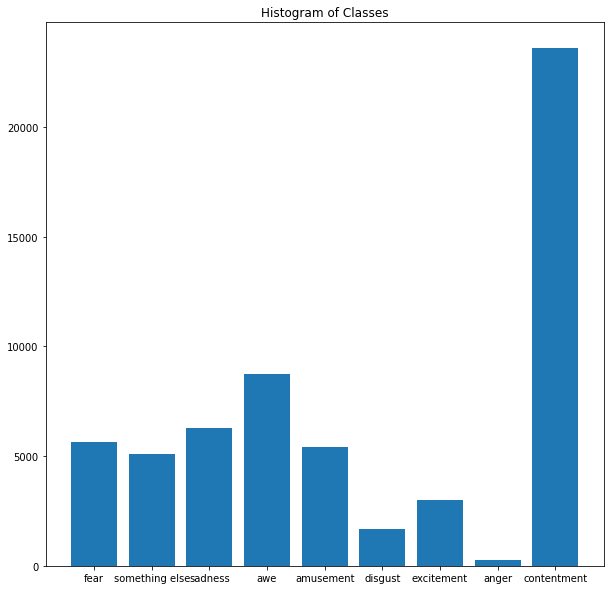

In [60]:
plt.figure(figsize=(10,10))
plt.hist(processed2.emotion,bins=range(0,10), rwidth=0.8,align="left")
plt.title('Histogram of Classes')

Text(0.5, 1.0, 'Histogram of Art Style')

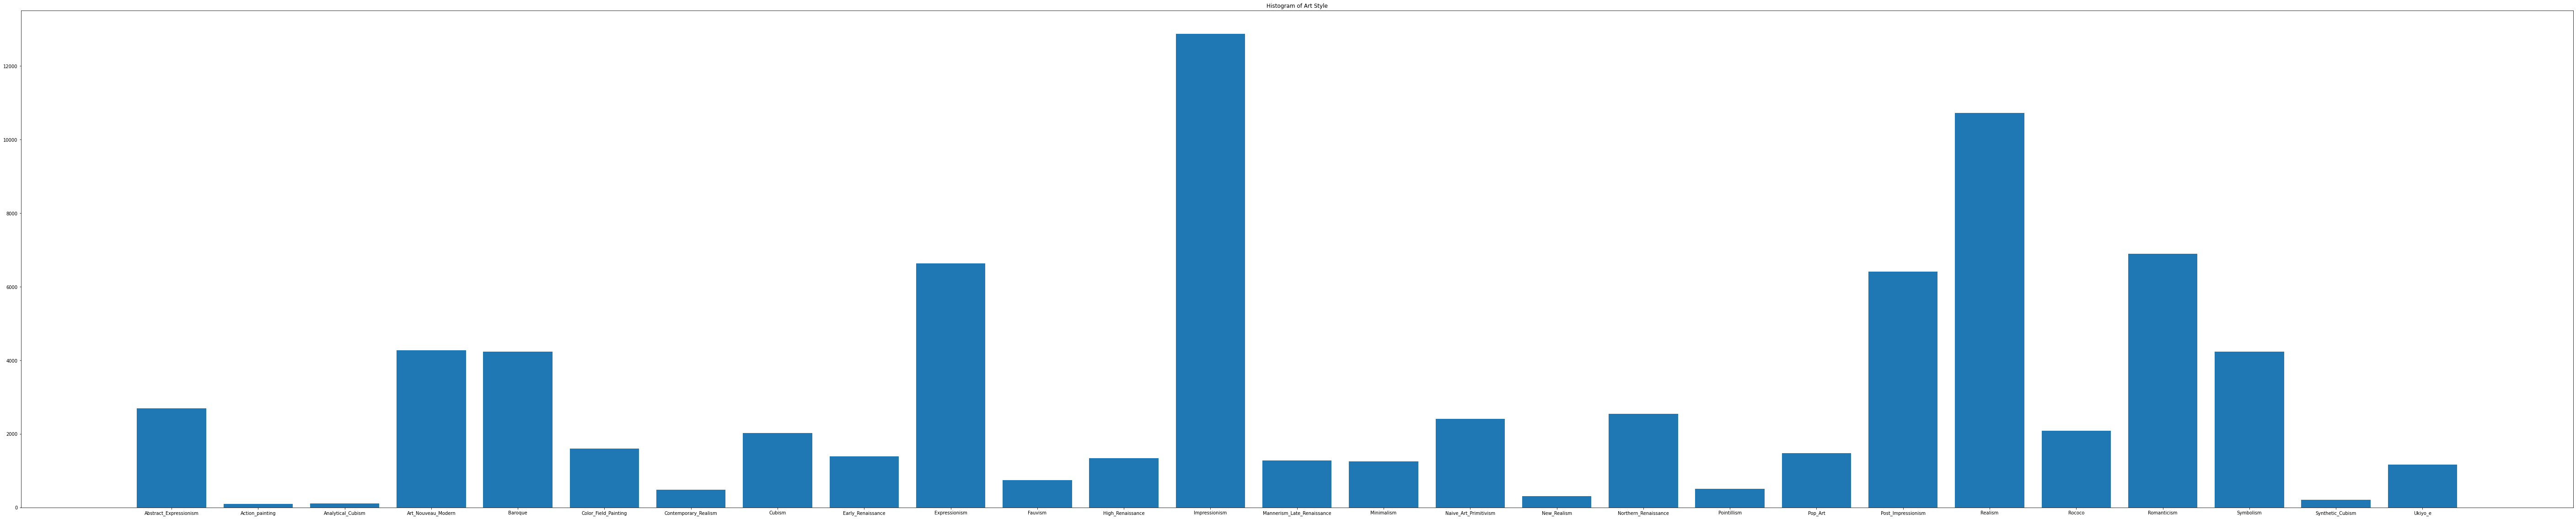

In [61]:
plt.figure(figsize=(100,20))
plt.hist(processed.art_style,bins=range(0,28), rwidth=0.8,align="left")
plt.title('Histogram of Art Style')

In [55]:
imageDB=DataBlock(blocks=(ImageBlock,CategoryBlock),
                  get_x=ColReader('path'),
                  get_y=ColReader('emotion'),
                  item_tfms=Resize(224,ResizeMethod.Pad, PadMode.Zeros))

Due to IPython and Windows limitation, python multiprocessing isn't available now.
So `number_workers` is changed to 0 to avoid getting stuck


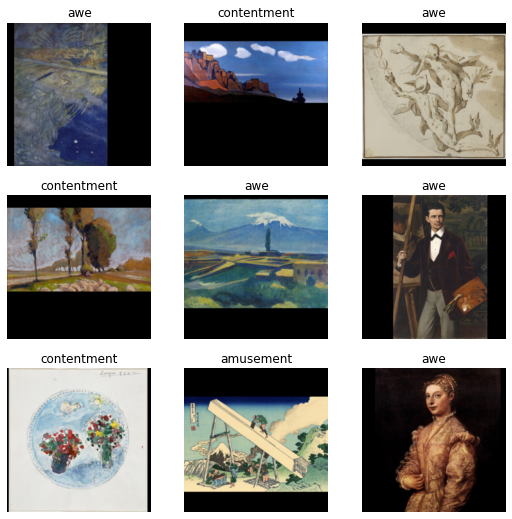

In [56]:
dls = imageDB.dataloaders(processed2,bs=16)
dls.show_batch()

In [57]:
opt_func = partial(ranger)
model=xresnet34_deeper
learn = vision_learner(dls, model,pretrained=False, metrics=error_rate,opt_func=opt_func)

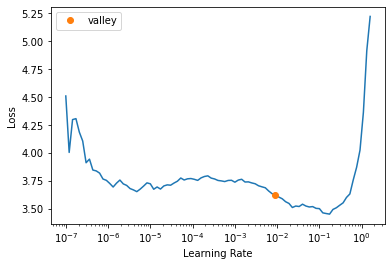

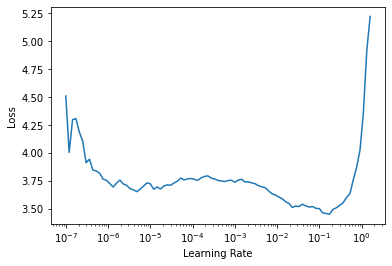

In [58]:
lr=learn.lr_find(suggest_funcs=(valley))
learn.recorder.plot_lr_find()

In [21]:
learn.fit_flat_cos(30,lr,pct_start=0.75, cbs=[SaveModelCallback (monitor='valid_loss', 
                                                                  comp=None, 
                                                                  min_delta=0.0,
                                                                  fname='classification_model_xresnet34_deeper', 
                                                                  every_epoch=False,
                                                                  at_end=False,
                                                                  with_opt=False, 
                                                                  reset_on_fit=True)])

epoch,train_loss,valid_loss,time
0,1.782968,628.524902,42:45
1,1.765235,318.964569,59:11
2,1.807082,1076.010132,1:01:22


Better model found at epoch 0 with valid_loss value: 628.52490234375.
Better model found at epoch 1 with valid_loss value: 318.9645690917969.


KeyboardInterrupt: 